## MLP for Binary Classification

In this lab, you will use the Ionosphere data binary (two-class) classification dataset to demonstrate an MLP for binary classification.

This dataset involves predicting whether a structure is in the atmosphere or not given radar returns.

The dataset will be downloaded automatically using Pandas, but you can learn more in the links below.

[Ionosphere Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv)

[Ionosphere Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.names)


Your task for this is lab is to develop a Keras-based Multi-Layer Perceptron model for this data set. Remember the number of output layers is equal to the number of classes.

Following we have provided some piece of code to you while you need to complete the rest of the code on your own.



In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Read the dataset from the path below. Store the data in a pandas dataframe named 'df'

Link to API - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [ ]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'

df = read_csv(path, header=None)

See the sample dataset. Print few rows of the dataset. Use dataframe.head() method.

Link to API:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [ ]:
# Your code to print first few rows of the dataset.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Print the basic info of the dataset. Use dataframe.info() from pandas library


In [ ]:
# Your code to print information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

Print the shape of the dataframe. Select suitable API call from the pandas library

In [ ]:
# Your code to print the shape of the dataset
df.shape

(351, 35)

# Separate the input and output from the dataframe. Input is all columns besides last column. Output is the last column.


In [ ]:
X = df.values[:, :-1]

# Your code to get y - Hint y = df.values[:, some parameters]
y = df.values[:, -1]


We have converted everthing in X to 'float' and the letters in column y to the numbers in the following cell.

In [ ]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

In [ ]:
LabelEncoder.fit_transform?

Printing the genral information of the X and y in the following cell

In [ ]:
# Your code to print X
print(X)

# Your code to print y
print(y)

# your code to print shape of X. Remember X is a numpy array
print(X.shape)

# your code to print shape of y. Remember y is a numpy array
print(y.shape)


[[ 1.       0.       0.99539 ... -0.54487  0.18641 -0.453  ]
 [ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

* Separate X and y into training and test set with a ratio of your choice.
* Print the shapes of the resulting arrays.
* Get the number of features from X_train. Remember the number of features are the number of inputs.

Use sklearn train_test_split class.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [ ]:
train_test_split?

In [ ]:
# Your code to separate the data into trauning and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Your code to print shape of X_train
# Your code to print shape of X_test
# Your code to print shape of y_train
# Your code to print shape of X_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


n_features = X_train.shape[1]
n_features

(235, 34) (116, 34) (235,) (116,)


34

In [ ]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0])

# Creating a Multi-layer Perceptron using Keras.
We have added first and last layers. Create the hidden layers of your choise.
You can chose any number of hidden layers and activation function of your chose

https://keras.io/api/layers/core_layers/dense/

In [ ]:
# define model

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))


#
# Add as many layers with activation functions of your choice
#
model.add(Dense(8, activation='relu'))



model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                350       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 447 (1.75 KB)
Trainable params: 447 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In the next cell, we trained the above neural network model and tested its accuracy. As this concept has still not benn covered in the class, just run the code to check the accuracy.

In [ ]:
# compile the model

# Training method: optimizer - "adam"
# adam (Adaptive Moment Estimation) Optimizer is one of the most common optimizers
# Measure of error in the Backpropagation algorithm: 'binary_crossentropy'
# The metric by which we will perform optimization is 'accuracy'

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fit the model

# mini-sample size batch_size = 32, we analyze at each step 32 lines,
# we determine the direction of the gradient from them and, in accordance with this
# determine the size of the weights
# the number of epochs = 150 - those how many times we carry out training
# verbose = 1 - printing information in the learning process

history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150


8/8 [==============================] - 1s 2ms/step - loss: 0.7138 - accuracy: 0.3362
Epoch 2/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.3447
Epoch 3/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5489
Epoch 4/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7021
Epoch 5/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7489
Epoch 6/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.7745
Epoch 7/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.7957
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.8298
Epoch 9/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.8511
Epoch 10/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.8511
Epoch 11/150
8/8 [=========

8/8 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9787
Epoch 81/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9787
Epoch 82/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9787
Epoch 83/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9787
Epoch 84/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9787
Epoch 85/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9787
Epoch 86/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.9787
Epoch 87/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9787
Epoch 88/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9787
Epoch 89/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9787
Epoch 90/150
8/8 [===============

In [ ]:
# evaluate the model

loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8966
Test Accuracy: 0.897


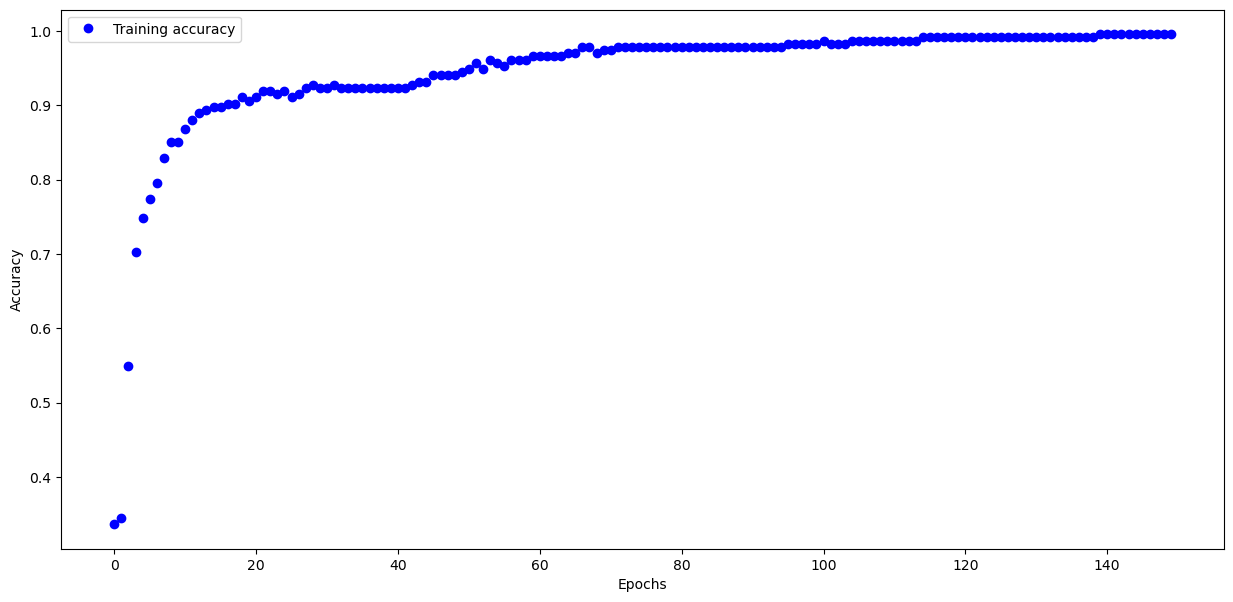

In [ ]:
# Accuracy graphs during training
import matplotlib.pyplot as plt

history_dict = history.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

** How much accuracy have you got? Compare the accuracy with your peers. **

** Now, change your model and activation function to get the better accuracy as compared to your peers **

In [ ]:
Dense?

In [ ]:
# define the NEW model

model = Sequential()
model.add(Dense(10, activation='gelu', input_shape=(n_features,)))


#
# Add as many layers with activation functions of your choice
#
model.add(Dense(8, activation='gelu'))
model.add(Dense(5, activation='gelu'))


model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                350       
                                                                 
 dense_21 (Dense)            (None, 8)                 88        
                                                                 
 dense_22 (Dense)            (None, 5)                 45        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 489 (1.91 KB)
Trainable params: 489 (1.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
8/8 [==============================] - 1s 2ms/step - loss: 0.6574 - accuracy: 0.7149
Epoch 2/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.7149
Epoch 3/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.7319
Epoch 4/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.7319
Epoch 5/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.7234
Epoch 6/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7234
Epoch 7/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.7277
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7319
Epoch 9/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.7362
Epoch 10/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7404
Epoch 11/150
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9830
Epoch 85/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9830
Epoch 86/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9830
Epoch 87/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9830
Epoch 88/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0596 - accuracy: 0.9830
Epoch 89/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9830
Epoch 90/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9830
Epoch 91/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9830
Epoch 92/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9830
Epoch 93/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9872
Epoch 94/150
8/8 [===============

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.9224
Test Accuracy: 0.922


### Important: Document in your lab logbook the accuracy of the improved model. Do not include any code or explanations in your lab logbook. Simply record the accuracy. For example, if the obtained accuracy is 0.98, then enter "0.98" in your lab logbook.
### In addition to the accuracy, also document the output of the neural network as provided in Task 2.

Next, we have provided the code to predict on an unknown value.
We will cover these concepts later in the class. For now, just run the code to see the prediction.

In [ ]:
row = [1,0,0.99539,-0.05889,0.85243,0.02306,
       0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
       0.59755,-0.44945,0.60536,-0.38223,0.84356,
       -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
       -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
       -0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 44ms/step
Predicted: 0.999


## One more model

In [ ]:
# More info regarding
# tensorflow.keras.initializers.he_normal()

#  https://keras.io/api/layers/initializers/
#  https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal

In [ ]:
model_2 = Sequential()
model_2.add(Dense(17, activation='relu', input_shape=(n_features,), kernel_initializer="he_normal"))
model_2.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model_2.add(Dense(8, activation='relu', kernel_initializer="he_normal"))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model_2.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 17)                595       
                                                                 
 dense_25 (Dense)            (None, 10)                180       
                                                                 
 dense_26 (Dense)            (None, 8)                 88        
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 872 (3.41 KB)
Trainable params: 872 (3.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_3 = model_2.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
8/8 [==============================] - 1s 2ms/step - loss: 0.8024 - accuracy: 0.3404
Epoch 2/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.5702
Epoch 3/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6553
Epoch 4/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.6851
Epoch 5/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.6936
Epoch 6/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7106
Epoch 7/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.7149
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7191
Epoch 9/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7362
Epoch 10/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7447
Epoch 11/150
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9915
Epoch 85/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9915
Epoch 86/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9915
Epoch 87/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9915
Epoch 88/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9915
Epoch 89/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9915
Epoch 90/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9915
Epoch 91/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9915
Epoch 92/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9957
Epoch 93/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9915
Epoch 94/150
8/8 [===============

In [ ]:
loss, acc = model_2.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.9138
Test Accuracy: 0.914


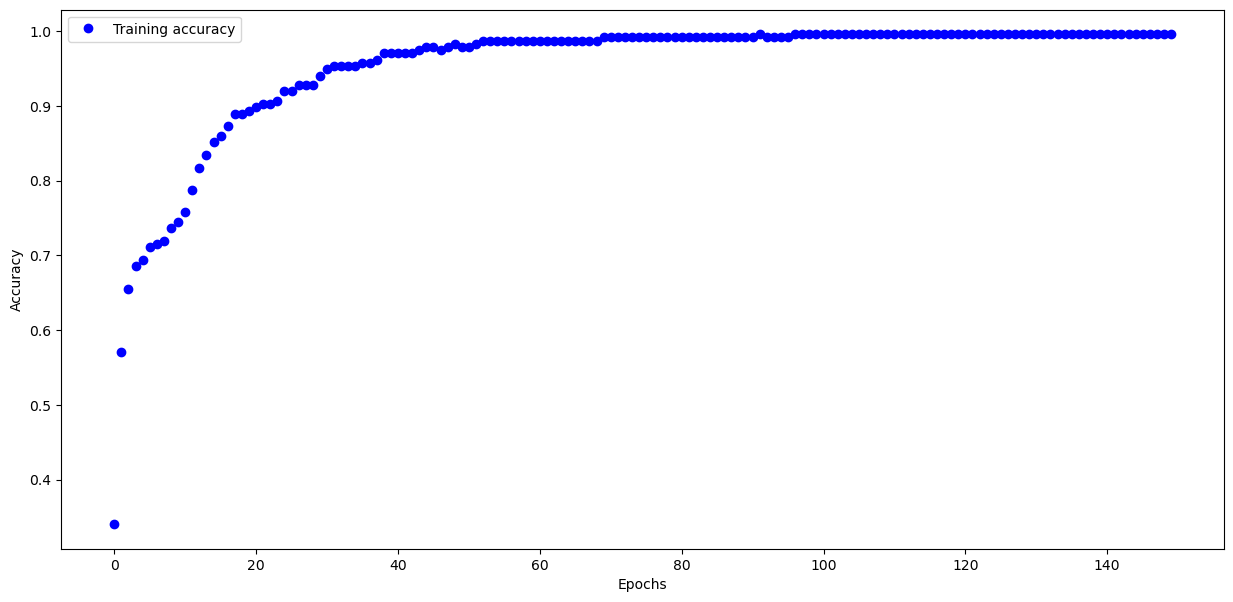

In [ ]:
history_dict = history_3.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
row = [1,0,0.99539,-0.05889,0.85243,0.02306,
       0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
       0.59755,-0.44945,0.60536,-0.38223,0.84356,
       -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
       -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
       -0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model_2.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 70ms/step
Predicted: 1.000


In [ ]:
# 100 % - enchanting result!

### Try out the same model with Keras Functional models!
Refer to [Keras](https://keras.io/) for more details and tutorials for the same.

### Define the layers & create the model object and input & output!

### https://keras.io/guides/functional_api/


#### The Keras Functional API is a way to create complex models, such as those with multiple outputs, models with shared layers, or acyclic graphs.

#### An example of a model with multiple inputs and multiple outputs:

![image.png](attachment:image.png)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense


In [ ]:
# define the layers

x_in = Input(shape=(n_features,))

x_in

<KerasTensor: shape=(None, 34) dtype=float32 (created by layer 'input_1')>

In [ ]:
x_1 = Dense(10, activation='relu')(x_in)
x_2 = Dense(8, activation='relu')(x_1)
x_out = Dense(1, activation='sigmoid')(x_2)

In [ ]:
# define model

model_3 = Model(inputs=x_in, outputs=x_out)

In [ ]:
print(model_3.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 dense_28 (Dense)            (None, 10)                350       
                                                                 
 dense_29 (Dense)            (None, 8)                 88        
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 447 (1.75 KB)
Trainable params: 447 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# compile the model

model_3.compile(optimizer="adam",
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


In [ ]:
# fit the model

history_4 = model_3.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
8/8 [==============================] - 1s 2ms/step - loss: 0.6786 - accuracy: 0.5872
Epoch 2/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6340
Epoch 3/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.6638
Epoch 4/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7532
Epoch 5/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7745
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.7660
Epoch 7/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.7830
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.8043
Epoch 9/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.8085
Epoch 10/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.8043
Epoch 11/150
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 0.9787
Epoch 85/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9787
Epoch 86/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 0.9787
Epoch 87/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9787
Epoch 88/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9787
Epoch 89/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9787
Epoch 90/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.9787
Epoch 91/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9745
Epoch 92/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.9830
Epoch 93/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9830
Epoch 94/150
8/8 [===============

In [ ]:
# evaluate the model

loss, acc = model_3.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.940


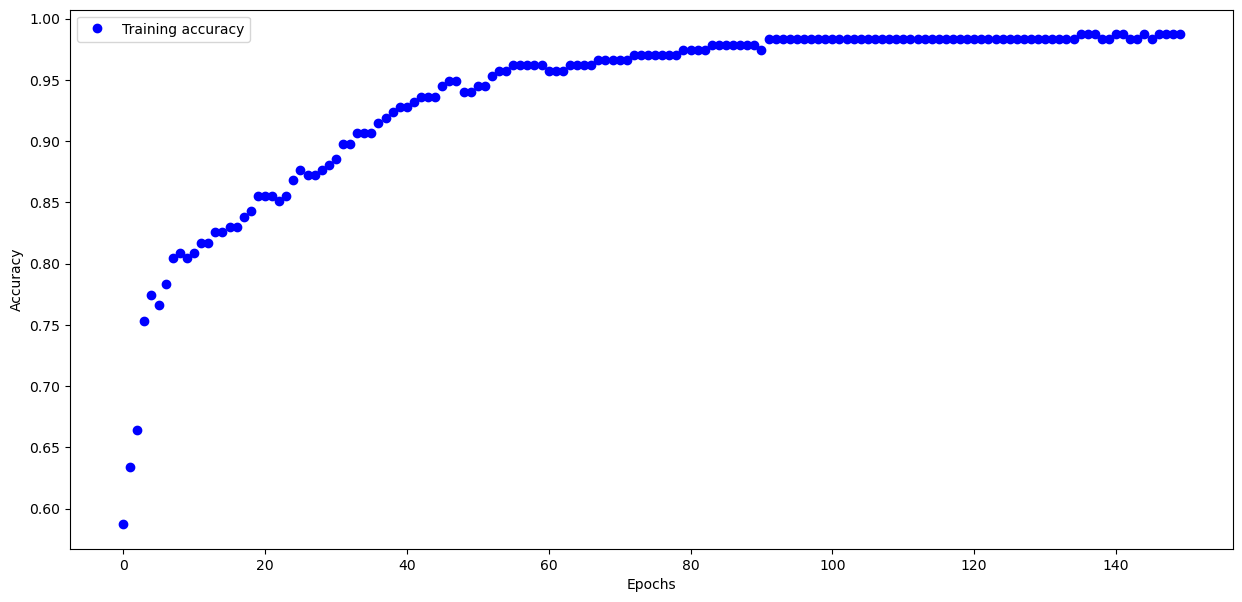

In [ ]:
history_dict = history_4.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# make a prediction - Copy a row of your choice!

row = [1,0,0.99539,-0.05889,0.85243,0.02306,
 0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
 0.59755,-0.44945,0.60536,-0.38223,0.84356,
 -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
 -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
 -0.34090,0.42267,-0.54487,0.18641,-0.45300]

yhat = model_3.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 63ms/step
Predicted: 0.995
